<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Deep_Learning/5_%EC%B6%9C%EB%A0%A5%EC%B8%B5_%EC%84%A4%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 출력층의 활성화 함수
* 이진 분류(Binary Classification) : $softmax$, $sigmoid$ 함수를 주료 사용
* 다중 분류(Mulitple Classification) : $softmax$

보통 전천후 함수로 $softmax$ 함수를 주로 사용하는 추세이고, $sigmoid$를 출력층의 활성화 함수로 사용할 때는 **출력층의 뉴런은 한개로 설정**한다.

$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}

$$

In [1]:
# softmax 함수 구현하기 - 원리
import numpy as np

a = np.array( [0.3, 2.9, 4.0] )

# 분자 계산
exp_a = np.exp(a) # 모든 입력 신호에 대한 지수 함수 적용

# 분모 계산
sum_exp_a = np.sum(exp_a) # 모든 입력 신호에 대한 지수 함수의 합

y = exp_a / sum_exp_a
print("softmax 결괏값 : {}".format(y))

softmax 결괏값 : [0.01821127 0.24519181 0.73659691]


In [2]:
print("softmax 결괏값의 총 합 : {}".format(np.sum(y)))

softmax 결괏값의 총 합 : 1.0


$softmax$ 함수 직접 구현

In [3]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [4]:
# 위에와 결과가 똑같은 것을 볼 수 있다
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

$softmax$ 함수 튜닝하기

In [5]:
big_a = np.array([1010, 1000, 990])
print(softmax(big_a))

[nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


## 오버플로우 발생 원인

$exp$함수는 지수함수이다. $e^{10}$ 은 약 20,000 이고, $e^{100}$은 0이 40개 넘어가고, $e^{1000}$은 컴퓨팅 시스템에서 무한대를 의미하는 $inf$를 의미

해결하기 위해서 $log$를 활용한다. 참고로 지수함수에서의 $log$는 뺄셈을 의미한다.


$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C\,exp(a_k)}{C\,\sum_{i=1}^n exp(a_i)} = \frac{exp(a_k+logC)}{\sum_{i=1}^n exp(a_i+logC)} = \frac{exp(a_k+C^\prime)}{\sum_{i=1}^n exp(a_i+C^\prime)} 
$$

1. 분자와 분모에 $C$라는 임의의 정수를 곱합니다.
2. $C$를 지수 함수 $exp$안으로 옮겨서 $log C$로 만들어 준다.
3. $log C$를 $C^{'}$ 이라는 새로운 기호로 바꿔준다.

In [6]:
# 보통 상수 C는 입력값 중에 제일 큰값으로 선정한다.
c = np.max(big_a)
print(big_a - c)

[  0 -10 -20]


In [7]:
print(np.exp(big_a - c) / np.sum(np.exp(big_a - c)))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [8]:
def softmax(a):
  c = np.max(a) # 상수 c 구하기( 입력의 최댓값 )
  exp_a = np.exp( a - c ) # a + log C

  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [9]:
big_y = softmax(big_a)
print("softmax 결과 : {}".format(big_y))
print("softmax 총합 : {}".format(np.sum(big_y)))

softmax 결과 : [9.99954600e-01 4.53978686e-05 2.06106005e-09]
softmax 총합 : 1.0


In [10]:
y = softmax(a)
print("softmax 결과 : {}".format(y))
print("softmax 총합 : {}".format(np.sum(y)))

softmax 결과 : [0.01821127 0.24519181 0.73659691]
softmax 총합 : 1.0


# 텐서플로우 MNIST 데이터 불러오고 형상 다루기

In [11]:
# tensorflow의 keras를 이용해서 MNIST 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# mnist 데이터셋 로딩
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

모아놓은 데이터의 형상(shape)부터 반드시 확인할 것

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
y_train.shape

(60000,)

In [15]:
# 이미지를 시각화
image = X_train[0] # 첫 번째 이미지 가져오기
image.shape

(28, 28)

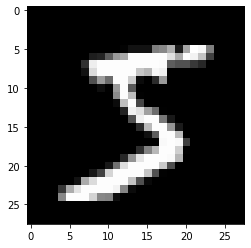

In [16]:
# matplotlib의 imshow를 이용해서 이미지 시각화
plt.imshow(image, 'gray')
plt.show()

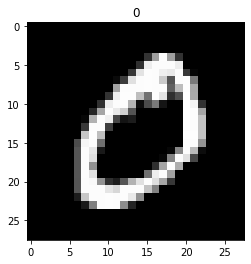

In [17]:
plt.imshow(X_train[1], 'gray')
plt.title(y_train[1])
plt.show()

신경망에 넣을 준비 - 훈련과 학습 모두다 똑같습니다... 1차원 형태로 데이터를 받는 레이어를 다음과 같이 이야기 합니다.

* 신경망 - Dense Layer
* 기하학 - Affine Layer
* 통합적 - Fully Connected Layer (완전 연결 계층)

세 방식의 공통점 : 입력되는 데이터의 차원이 (N, M) 여기서 N은 BATCH_SIZE, M은 데이터의 스칼라 개수
* 배치를 이야기 하지 않으면 (M, )
* 배치를 이야기 하면 (N, M)

CNN은 Fully Connected Layer가 아니고 2차원 배치 데이터를 사용하기 때문에 입력 데이터의 형상이 `(N, H, W, C)`가 된다.

In [18]:
image = X_train[0].flatten()
image.shape

(784,)

In [19]:
image = X_train[0].reshape(-1)
image.shape

(784,)

In [20]:
# ravel()은 잘 쓰지 않는다. -> 원본 이미지가 훼손될 염려가 있기 때문에
# image = np.ravel(X_train[0])
# image.shape

위 처럼 2차원 데이터를 1차원으로 펴는 작업을 **데이터 평탄화**라고 한다.

In [21]:
image.shape

(784,)

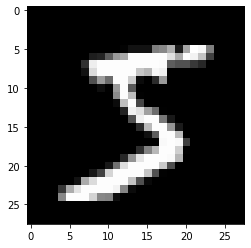

In [22]:
# 평탄화된 이미지를 원래대로 복구
image_bokgu = image.reshape(28, 28)
plt.imshow(image_bokgu, 'gray')
plt.show()

MNIST 손글씨 데이터셋을 위한 신경망 만들기 - Fully Connected Layer ( ANN - Affine Neural Network)

In [37]:
# 활성화 함수 구현( 시그모이드 )
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 테스트용 데이터 가져오기
def get_test_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  IMAGE_SIZE = X_test.shape[0]
  X_test_reshaped = X_test.reshape(IMAGE_SIZE, -1)

  return X_test_reshaped, y_test



# 훈련된 신경망 가져오기
def init_network():
  import pickle
  with open('./sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)
  
  return network

def predict(network, x):
  
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  # 구현시에 나는 대부분의 오류는 데이터의 shape 때문이다.
  # 1. 각 층은 입력되는 값과 해당층의 가중치를 곱하고 편향을 더한다.
  # 2. (1)에 의해서 계산된 값에 각 층의 활성화 함수를 씌워주고 다음층으로 넘긴다.

  # Layer 1 계산하기 ( 입력 : x )
  z1 = np.dot(x, W1) + b1
  a1 = sigmoid(z1)

  # Layer 2 계산하기 ( 입력 : a1 )
  z2 = np.dot(a1, W2) + b2
  a2 = sigmoid(z2)

  # Layer 3 계산하기 ( 입력 : a2 ) - 출력층이기 때문에 활성화 함수로 softmax를 사용한다.
  z3 = np.dot(a2, W3) + b3
  y = softmax(z3)

  return y

In [38]:
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3'],

W1.shape, W2.shape, W3.shape

((784, 50), (50, 100), (100, 10))

In [39]:
b1.shape, b2.shape, b2.shape

((50,), (100,), (100,))

이미지 한장을 예측 (predict)

* 각 은닉층의 활성화 함수는 $sigmoid$로 설정
* 제일 마지막 출력층의 활성화 함수는 $softmax$로 설정

In [40]:
X, y = get_test_data()

test_image, test_target = X[0], y[0]

test_image.shape, test_target.shape

((784,), ())

In [41]:
network = init_network()

test_result = predict(network, test_image)
test_result, test_target

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


(array([4.2879005e-06, 4.5729317e-07, 1.8486280e-04, 8.3605024e-05,
        1.5084674e-07, 6.3182205e-07, 4.5782045e-10, 9.9919468e-01,
        3.8066935e-07, 5.3083024e-04], dtype=float32), 7)

In [42]:
np.argmax(test_result) == test_target

True

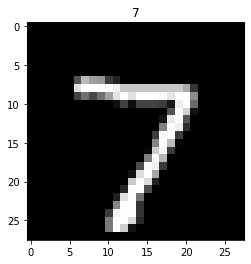

In [43]:
plt.imshow(test_image.reshape(28, 28), 'gray')
plt.title(test_target)
plt.show()

network의 정확도(accuracy) 구하기

In [44]:
X, y = get_test_data()

network = init_network()
accuracy_count = 0 # 정답을 맞춘 개수를 저장

# 사진을 한장씩 꺼내서 predict 하기
for i in range(len(X)):
  pred = predict(network, X[i]) # (10, )
  pred = np.argmax(pred) # 확률이 가장 높은 원소의 인덱스

  # 예측한 것과 정답이 같으면
  if pred == y[i]:
    accuracy_count += 1
  

print(float(accuracy_count) / len(X)) # 평균 정답 구하기

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.9207


위의 코드의 단점
* 10,000장의 이미지를 한장씩 예측하고 있다.
* 시간이 오래걸린다는 이야기.

어떻게 해결할 수 있을까?
* BATCH를 사용해서 한장씩이 아닌 뭉터기로 예측하게 하겠다.
* BATCH란 데이터의 뭉터기

In [45]:
# 배치를 활용한 예측
X, y = get_test_data()

network = init_network()

# 배치란? 데이터의 묶음이다.
# batch_size : 1 배치당 들어있어야 하는 데이터의 개수
# ex) 60,000개의 데이터를 batch_size 100으로 묶으면 600개의 배치가 생긴다.

batch_size = 100
accuracy_count = 0

# batch_size 개씩 건너 뛰면서 예측 수행
for i in range(0, len(X), batch_size):
  X_batch = X[i : i + batch_size]
  pred_batch = predict(network, X_batch) # 데이터를 100개씩 예측
  pred_batch = np.argmax(pred_batch, axis=1) # axis 설정을 어떻게 해야 할까요?

  accuracy_count += np.sum( pred_batch == y[i : i + batch_size]) # 예측값 + 정답 (100개씩 한꺼번에 계산)

print(float(accuracy_count) / len(X)) # 전체 평균 구하기

0.9207


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


배치를 활용해서 데이터를 모두 소모하면( 활용하면 ) 이것을 1 에폭(epoch)이라고 한다.

`np.argmax`의 `axis`가 1인 이유
1. $softmax$의 결과는 10개의 원소(결과물)를 가진 1차원 배열
2. 이 결과물이 100개씩 묶음 지어져 있다. (배치)
3. `np.argmax`의 `axis`를 1로 줘야지만 각 행별로 최대값의 인덱스를 구한다.
4. `axis=0`은 1차원 배열이 추가되는 방향이기 때문에...